In [1]:
from pybas.inference import TTest
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
x = np.random.randn(10) + 2
y = np.random.randn(10)

In [5]:
TTest().fit(x, y)

INFO:pybas.utils:Compiling t_test model
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_86eb7290a5926f729c4942e7b8ee6a0d NOW.


CompileError: command 'gcc' failed with exit status 1

In [6]:
from pymc3 import Model, Normal, invlogit, Binomial, sample, forestplot
import numpy as np

/Users/tabacof/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
%%time
n = np.ones(4)*5
y = np.array([0, 1, 3, 5])
dose = np.array([-.86,-.3,-.05,.73])

with Model() as bioassay_model:

    # Prior distributions for latent variables
    alpha = Normal('alpha', 0, sd=100)
    beta = Normal('beta', 0, sd=100)

    # Linear combinations of parameters
    theta = invlogit(alpha + beta*dose)

    # Model likelihood
    deaths = Binomial('deaths', n=n, p=theta, observed=y)

CPU times: user 482 ms, sys: 85 ms, total: 567 ms
Wall time: 2.46 s


INFO:pymc3:Auto-assigning NUTS sampler...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:NUTS: [beta, alpha]
Sampling 4 chains: 100%|██████████| 10000/10000 [00:02<00:00, 3638.48draws/s]
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.


CPU times: user 3.16 s, sys: 383 ms, total: 3.55 s
Wall time: 5.22 s


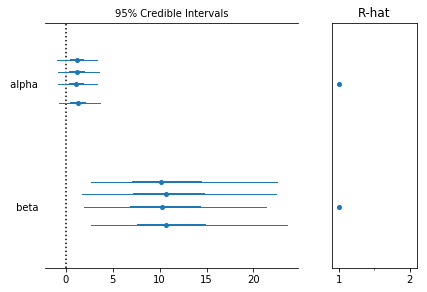

In [8]:
%%time
with bioassay_model:

    # Draw wamples
    trace = sample(2000, njobs=4)
    # Plot two parameters
    forestplot(trace, varnames=['alpha', 'beta'])

In [ ]:
sample?